In [11]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt


In [12]:
data = pl.read_csv("../dumps/voip_simulation_data.csv")
data.head()

timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,total_packets,packet_loss_percent,rtt_ms,mos,r_factor,net_rx_pkts,net_rx_bytes,net_rx_drop,net_rx_errs,net_tx_pkts,net_tx_bytes,net_tx_drop,net_tx_errs,link_utilization_percent,packets_per_second,drop_rate_percent,error_rate_percent,one_way_delay_ms,congestion_score,burstiness_score,throughput_efficiency,avg_inter_packet_time_ms,std_inter_packet_time_ms,packet_size_variance,retransmission_rate_percent,out_of_order_rate_percent,bytes_per_second
f64,str,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.2,"""h13->h10""",0.0,0.2,1.18e6,73.36,53,73,73.0,0.0,1.217133,18.778062,90,4680,0,0,53,2756,0,0,11.8,365.0,0.0,0.0,0.0,0.6472,0.0,0.273973,0.0,0.0,0.0,0.0,0.0,0.0
0.4,"""h13->h10""",0.2,0.4,118000.0,64.568,0,2,0.0,0.0,4.409286,93.2,90,4680,0,0,53,2756,0,0,1.18,10.0,0.0,0.0,0.0,0.20472,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0.6,"""h13->h10""",0.4,0.6,58800.0,60.533,0,1,0.0,0.0,4.409286,93.2,0,0,0,0,0,0,0,0,0.588,5.0,0.0,0.0,0.0,0.202352,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0.8,"""h13->h10""",0.6,0.8,118000.0,53.203,0,2,0.0,0.0,4.409286,93.2,0,0,0,0,0,0,0,0,1.18,10.0,0.0,0.0,0.0,0.20472,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,"""h13->h10""",0.8,1.0,118000.0,46.761,0,2,0.0,0.0,4.409286,93.2,0,0,0,0,0,0,0,0,1.18,10.0,0.0,0.0,0.0,0.191764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,total_packets,packet_loss_percent,rtt_ms,mos,r_factor,net_rx_pkts,net_rx_bytes,net_rx_drop,net_rx_errs,net_tx_pkts,net_tx_bytes,net_tx_drop,net_tx_errs,link_utilization_percent,packets_per_second,drop_rate_percent,error_rate_percent,one_way_delay_ms,congestion_score,burstiness_score,throughput_efficiency,avg_inter_packet_time_ms,std_inter_packet_time_ms,packet_size_variance,retransmission_rate_percent,out_of_order_rate_percent,bytes_per_second
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",251881.0,"""251881""",251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1720.02819,null,1719.642821,1720.02819,100288.356406,0.069049,0.012299,3.287271,0.071045,162.742919,4.359527,91.060897,430.087922,288049.42453,0.0,0.0,424.587535,287563.691223,0.0,0.0,1.002884,8.536454,0.0,0.0,81.371459,0.004894,0.0,0.999455,0.0,0.0,0.0,0.0,0.0,0.0
"""std""",1042.766062,null,1042.75254,1042.766062,28533.443003,1.39598,1.48778,219.927331,1.846012,123.783546,0.143346,3.680528,54.999522,31970.964383,0.0,0.0,49.678752,30749.54199,0.0,0.0,0.285334,5.551254,0.0,0.0,61.891773,0.016914,0.0,0.016915,0.0,0.0,0.0,0.0,0.0,0.0
"""min""",0.2,"""h0->h8""",0.0,0.2,58800.0,0.004,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.588,4.997501,0.0,0.0,0.0,0.002368,0.0,0.052257,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",813.8041,null,813.6041,813.8041,58800.0,0.011,0.0,1.0,0.0,37.9,4.346761,90.32,398.0,266490.0,0.0,0.0,399.0,266316.0,0.0,0.0,0.588,5.0,0.0,0.0,18.95,0.002432,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""50%""",1654.0083,null,1653.6083,1654.0083,118000.0,0.014,0.0,2.0,0.0,177.0,4.364462,91.076,424.0,282890.0,0.0,0.0,423.0,281660.0,0.0,0.0,1.18,10.0,0.0,0.0,88.5,0.004768,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""75%""",2623.0131,null,2622.6131,2623.0131,118000.0,0.018,0.0,2.0,0.0,240.0,4.40031,92.7452,457.0,307482.0,0.0,0.0,443.0,306784.0,0.0,0.0,1.18,10.0,0.0,0.0,120.0,0.004784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""max""",3591.96,"""h9->h4""",3591.818,3591.96,1.23e6,111.354,521.0,30615.0,95.0,2663.0,4.409286,93.2,1683.0,989970.0,0.0,0.0,1554.0,804292.0,0.0,0.0,12.3,2105.0,0.0,0.0,1331.5,0.6492,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
USED_COLUMNS = [
    "timestamp",
    "flow_id",
    "interval_start",
    "interval_end",
    "bandwidth_bps",
    "jitter_ms",
    "packet_loss_cnt",
    "packet_loss_percent",
    "rtt_ms",
    "mos",
    "link_utilization_percent",
    "packets_per_second",
    "congestion_score",
    "one_way_delay_ms",
    "throughput_efficiency",
    "net_tx_pkts",
    "net_tx_bytes",
]

df = data.select(USED_COLUMNS)
df.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",251881.0,"""251881""",251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1720.02819,null,1719.642821,1720.02819,100288.356406,0.069049,0.012299,0.071045,162.742919,4.359527,1.002884,8.536454,0.004894,81.371459,0.999455,424.587535,287563.691223
"""std""",1042.766062,null,1042.75254,1042.766062,28533.443003,1.39598,1.48778,1.846012,123.783546,0.143346,0.285334,5.551254,0.016914,61.891773,0.016915,49.678752,30749.54199
"""min""",0.2,"""h0->h8""",0.0,0.2,58800.0,0.004,0.0,0.0,0.0,1.0,0.588,4.997501,0.002368,0.0,0.052257,0.0,0.0
"""25%""",813.8041,null,813.6041,813.8041,58800.0,0.011,0.0,0.0,37.9,4.346761,0.588,5.0,0.002432,18.95,1.0,399.0,266316.0
"""50%""",1654.0083,null,1653.6083,1654.0083,118000.0,0.014,0.0,0.0,177.0,4.364462,1.18,10.0,0.004768,88.5,1.0,423.0,281660.0
"""75%""",2623.0131,null,2622.6131,2623.0131,118000.0,0.018,0.0,0.0,240.0,4.40031,1.18,10.0,0.004784,120.0,1.0,443.0,306784.0
"""max""",3591.96,"""h9->h4""",3591.818,3591.96,1.23e6,111.354,521.0,95.0,2663.0,4.409286,12.3,2105.0,0.6492,1331.5,1.0,1554.0,804292.0


In [15]:
df = df.cast(
    {
        "timestamp": pl.Int32,
        "interval_start": pl.Int32,
        "interval_end": pl.Int32,
    }
)

df.head()

timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
i32,str,i32,i32,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64
0,"""h13->h10""",0,0,1.18e6,73.36,53,73.0,0.0,1.217133,11.8,365.0,0.6472,0.0,0.273973,53,2756
0,"""h13->h10""",0,0,118000.0,64.568,0,0.0,0.0,4.409286,1.18,10.0,0.20472,0.0,1.0,53,2756
0,"""h13->h10""",0,0,58800.0,60.533,0,0.0,0.0,4.409286,0.588,5.0,0.202352,0.0,1.0,0,0
0,"""h13->h10""",0,0,118000.0,53.203,0,0.0,0.0,4.409286,1.18,10.0,0.20472,0.0,1.0,0,0
1,"""h13->h10""",0,1,118000.0,46.761,0,0.0,0.0,4.409286,1.18,10.0,0.191764,0.0,1.0,0,0


In [16]:
df = df.with_columns(
    flow_start=pl.col("flow_id").str.split("->").list.get(0),
    flow_end=pl.col("flow_id").str.split("->").list.get(-1),
)

df.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes,flow_start,flow_end
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""count""",251881.0,"""251881""",251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,"""251881""","""251881"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",1719.619523,null,1719.234269,1719.619523,100288.356406,0.069049,0.012299,0.071045,162.742919,4.359527,1.002884,8.536454,0.004894,81.371459,0.999455,424.587535,287563.691223,null,null
"""std""",1042.760783,null,1042.747288,1042.760783,28533.443003,1.39598,1.48778,1.846012,123.783546,0.143346,0.285334,5.551254,0.016914,61.891773,0.016915,49.678752,30749.54199,null,null
"""min""",0.0,"""h0->h8""",0.0,0.0,58800.0,0.004,0.0,0.0,0.0,1.0,0.588,4.997501,0.002368,0.0,0.052257,0.0,0.0,"""h0""","""h0"""
"""25%""",813.0,null,813.0,813.0,58800.0,0.011,0.0,0.0,37.9,4.346761,0.588,5.0,0.002432,18.95,1.0,399.0,266316.0,null,null
"""50%""",1654.0,null,1653.0,1654.0,118000.0,0.014,0.0,0.0,177.0,4.364462,1.18,10.0,0.004768,88.5,1.0,423.0,281660.0,null,null
"""75%""",2623.0,null,2622.0,2623.0,118000.0,0.018,0.0,0.0,240.0,4.40031,1.18,10.0,0.004784,120.0,1.0,443.0,306784.0,null,null
"""max""",3591.0,"""h9->h4""",3591.0,3591.0,1.23e6,111.354,521.0,95.0,2663.0,4.409286,12.3,2105.0,0.6492,1331.5,1.0,1554.0,804292.0,"""h9""","""h9"""


In [17]:
df = df.sort(["flow_id", "timestamp"])
df.describe()

statistic,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes,flow_start,flow_end
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""count""",251881.0,"""251881""",251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,251881.0,"""251881""","""251881"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",1719.619523,null,1719.234269,1719.619523,100288.356406,0.069049,0.012299,0.071045,162.742919,4.359527,1.002884,8.536454,0.004894,81.371459,0.999455,424.587535,287563.691223,null,null
"""std""",1042.760783,null,1042.747288,1042.760783,28533.443003,1.39598,1.48778,1.846012,123.783546,0.143346,0.285334,5.551254,0.016914,61.891773,0.016915,49.678752,30749.54199,null,null
"""min""",0.0,"""h0->h8""",0.0,0.0,58800.0,0.004,0.0,0.0,0.0,1.0,0.588,4.997501,0.002368,0.0,0.052257,0.0,0.0,"""h0""","""h0"""
"""25%""",813.0,null,813.0,813.0,58800.0,0.011,0.0,0.0,37.9,4.346761,0.588,5.0,0.002432,18.95,1.0,399.0,266316.0,null,null
"""50%""",1654.0,null,1653.0,1654.0,118000.0,0.014,0.0,0.0,177.0,4.364462,1.18,10.0,0.004768,88.5,1.0,423.0,281660.0,null,null
"""75%""",2623.0,null,2622.0,2623.0,118000.0,0.018,0.0,0.0,240.0,4.40031,1.18,10.0,0.004784,120.0,1.0,443.0,306784.0,null,null
"""max""",3591.0,"""h9->h4""",3591.0,3591.0,1.23e6,111.354,521.0,95.0,2663.0,4.409286,12.3,2105.0,0.6492,1331.5,1.0,1554.0,804292.0,"""h9""","""h9"""


In [18]:
TARGET_COLUMNS = [
    "bandwidth_bps",
    "jitter_ms",
    "packet_loss_percent",
    "rtt_ms",
    "mos",
    "link_utilization_percent",
    "packets_per_second",
    "congestion_score",
    "one_way_delay_ms",
    "throughput_efficiency",
    "net_tx_pkts",
    "net_tx_bytes",
]

In [19]:
def plot_device_stats(
    metric: str,
    figsize=(15, 6),
    flow_side: str = "flow_start",
    logscale=False,
):
    plt.figure(figsize=figsize)

    for flow in df[flow_side].unique():
        subset = df.filter(pl.col(flow_side) == flow)
        plt.plot(subset["timestamp"], subset[metric], label=flow)

    plt.xlabel("Timestamp")
    plt.ylabel(metric)
    plt.title(f"{metric} over time by {flow_side}")
    plt.legend()

    if logscale:
        plt.yscale("log")
    plt.show()

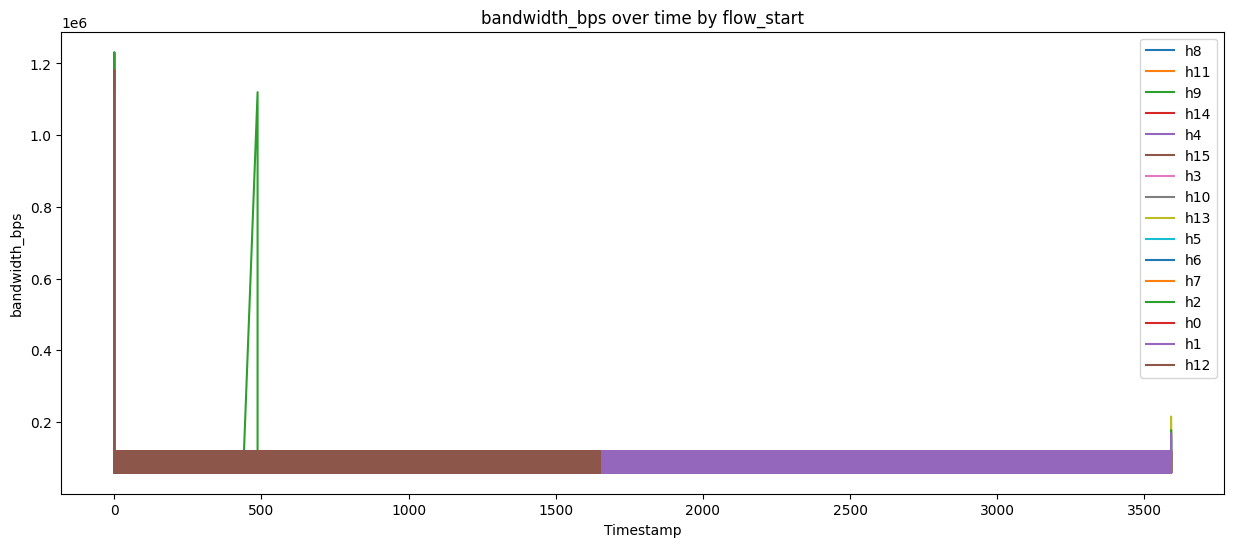

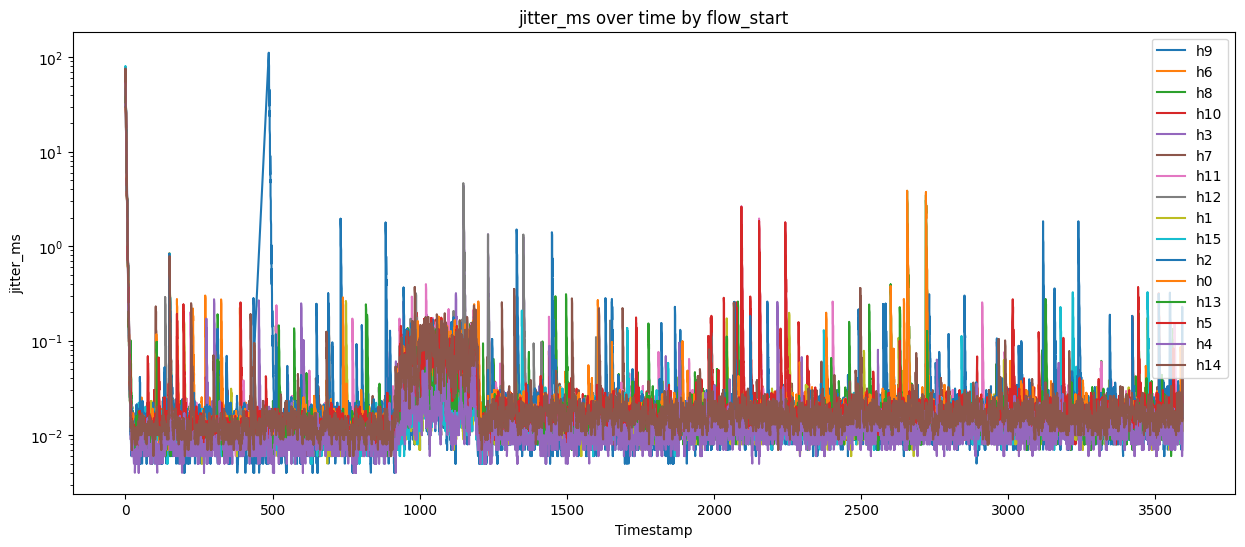

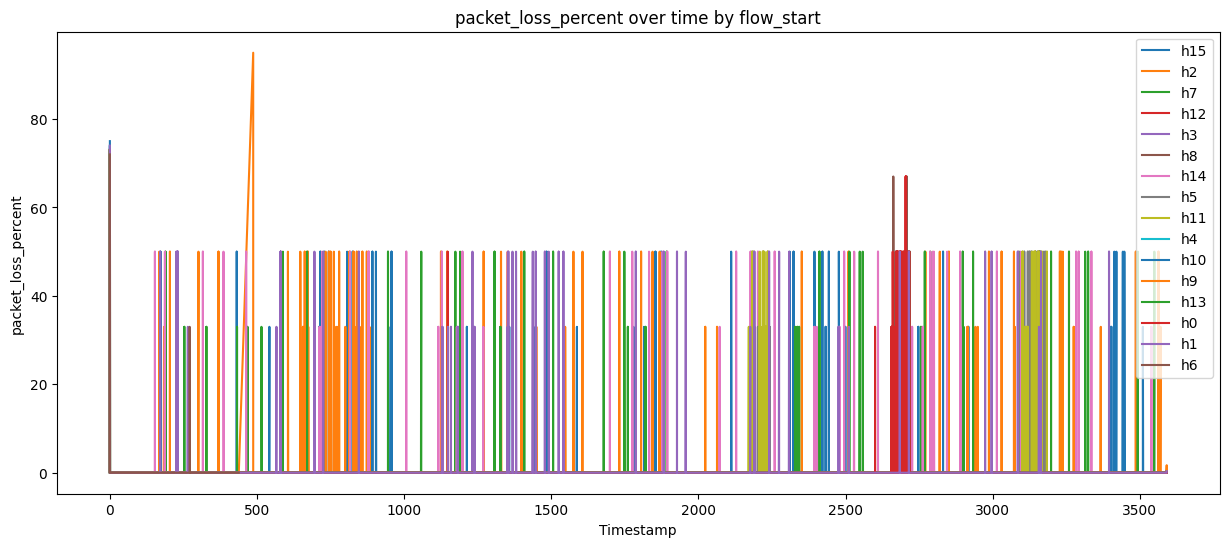

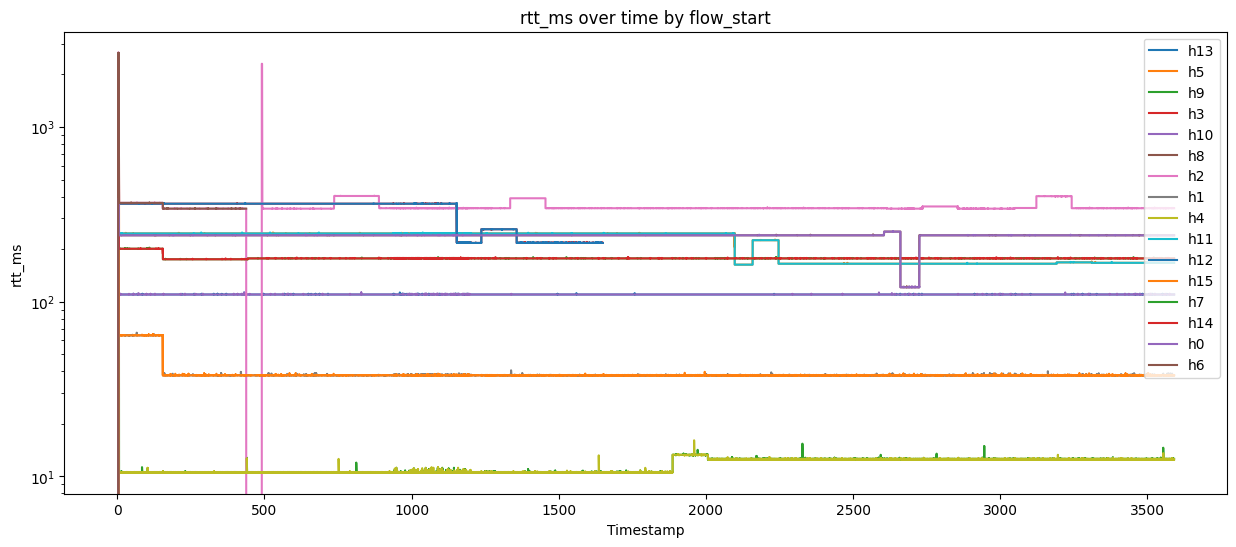

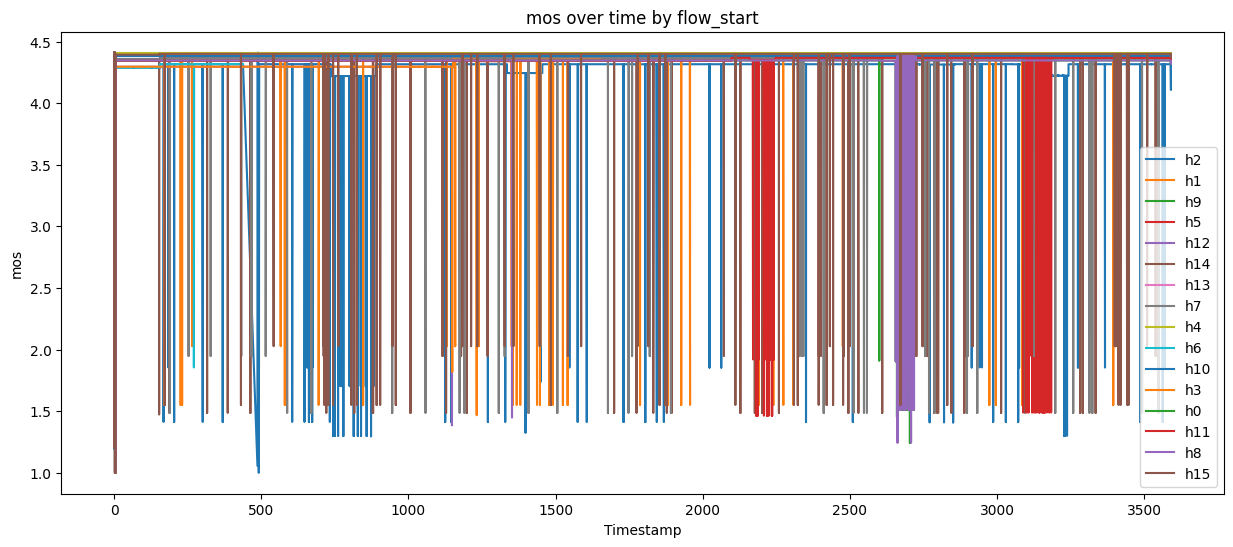

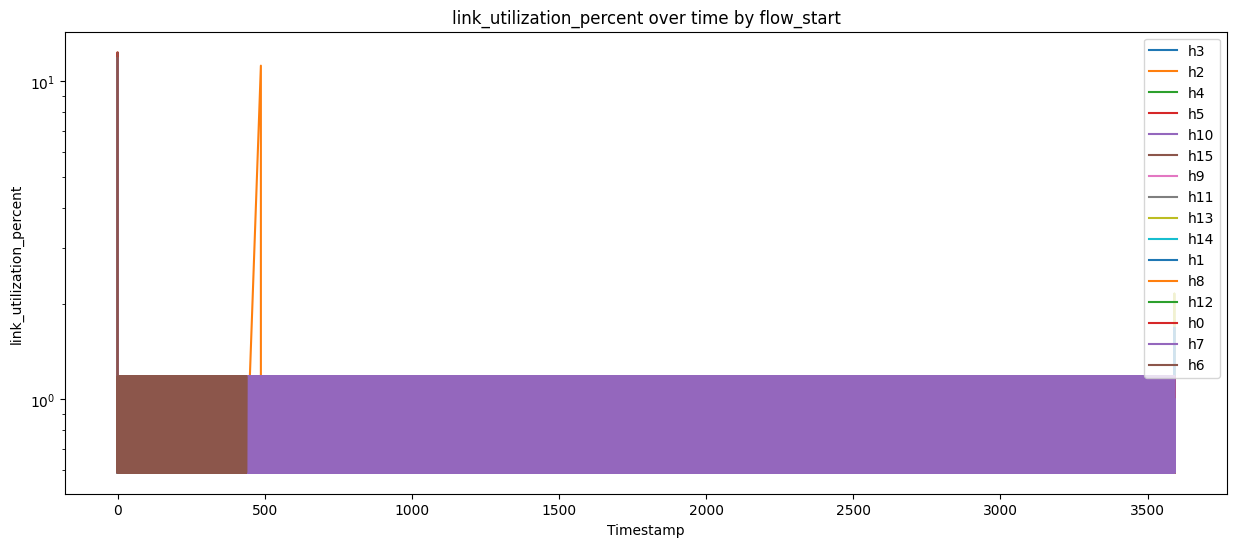

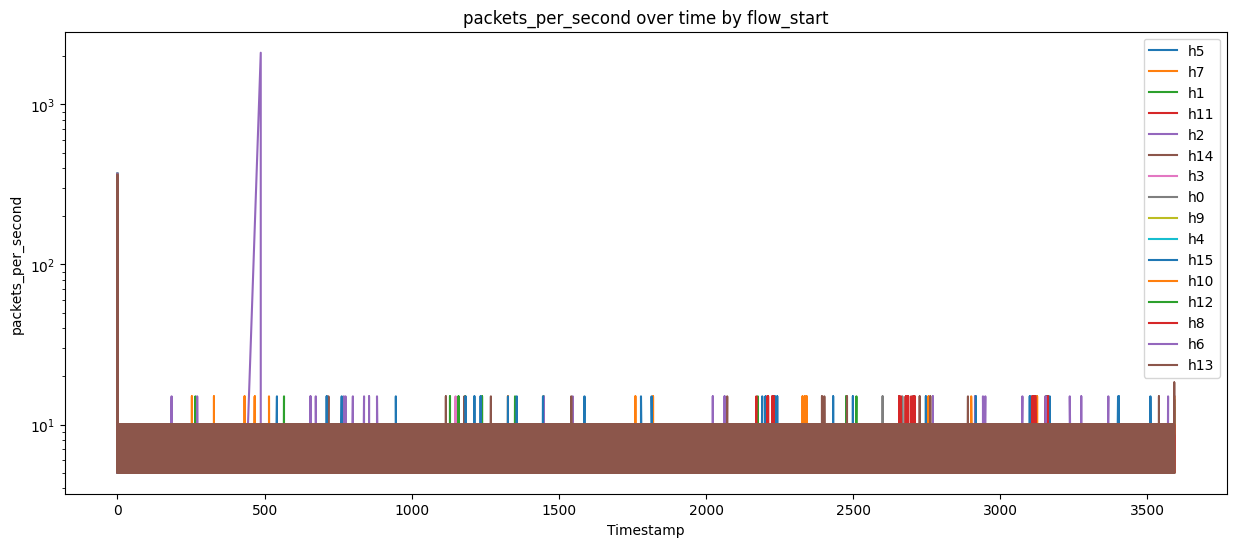

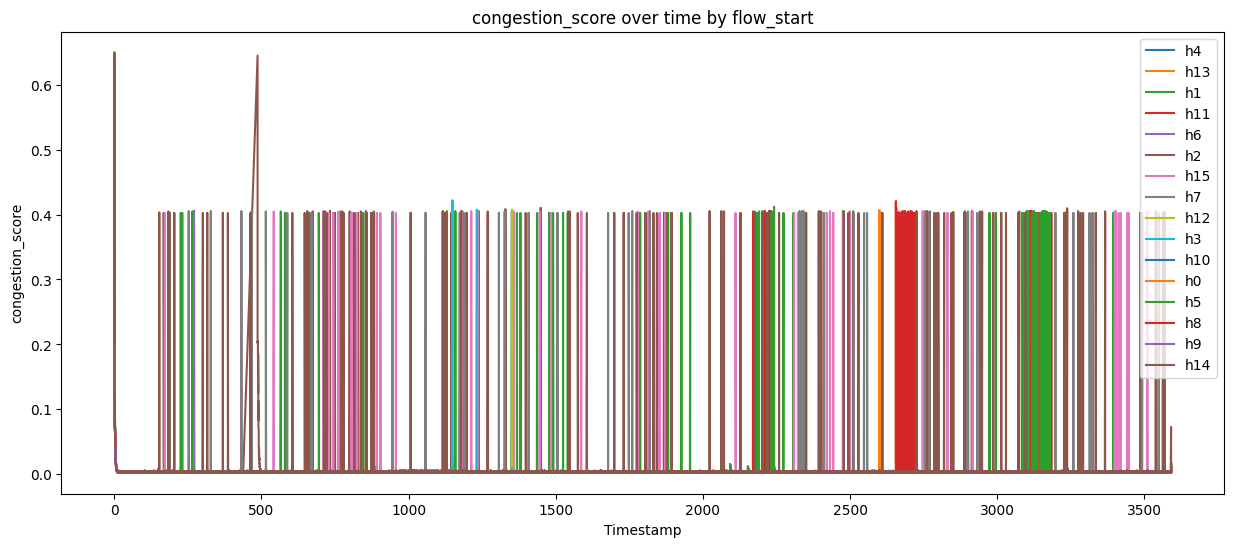

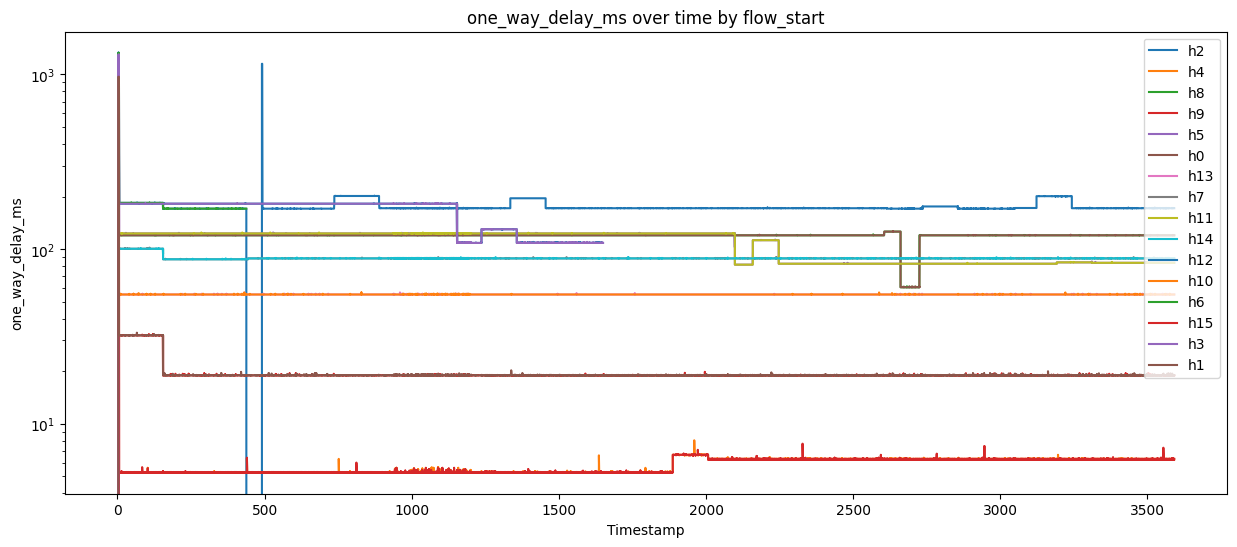

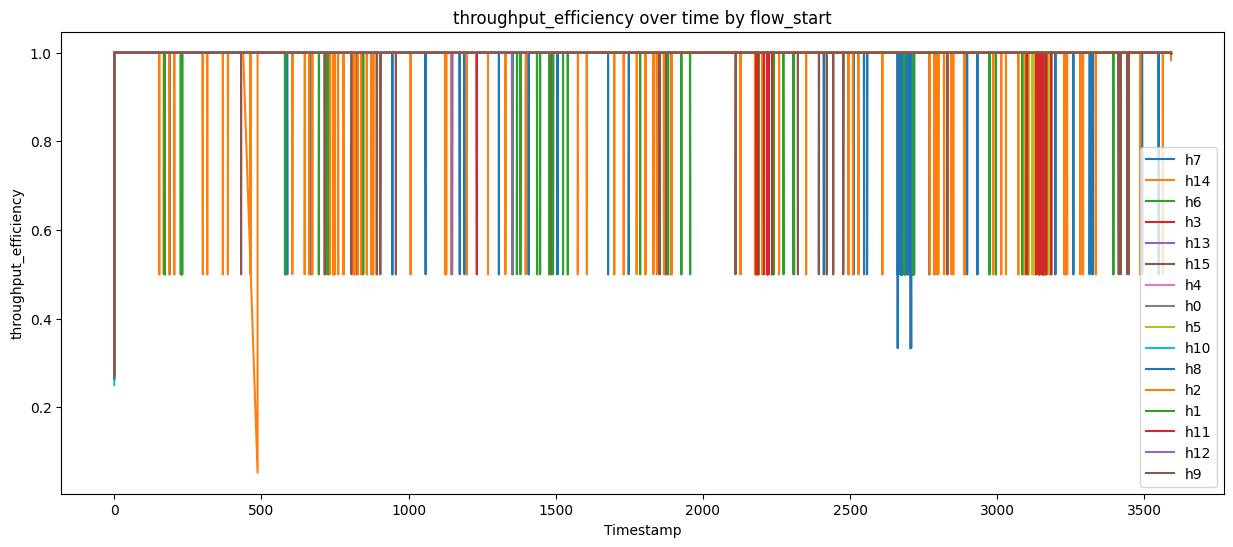

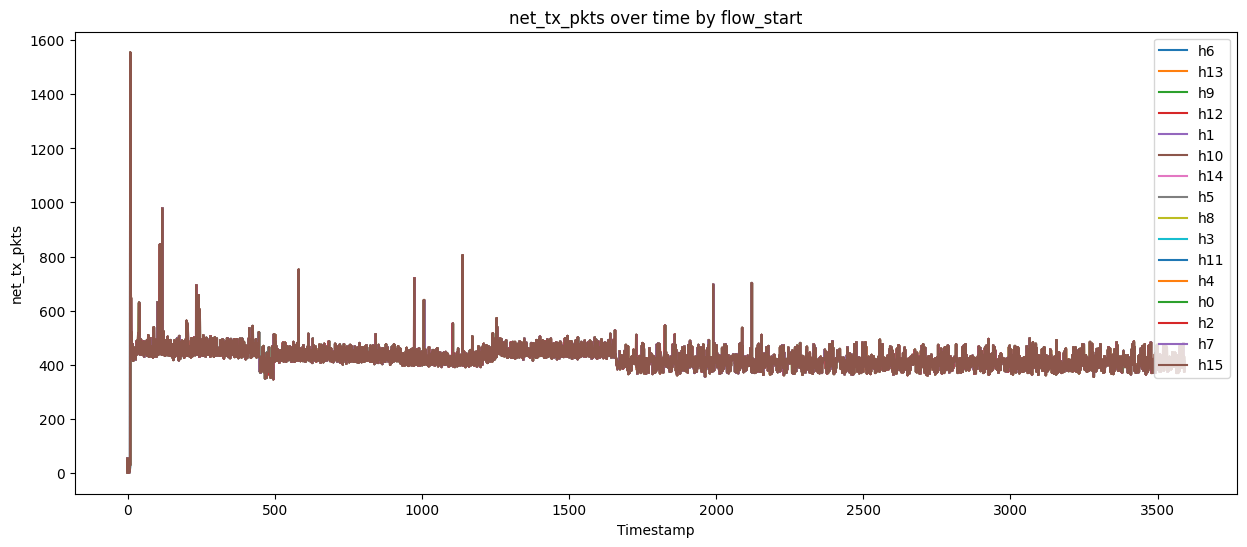

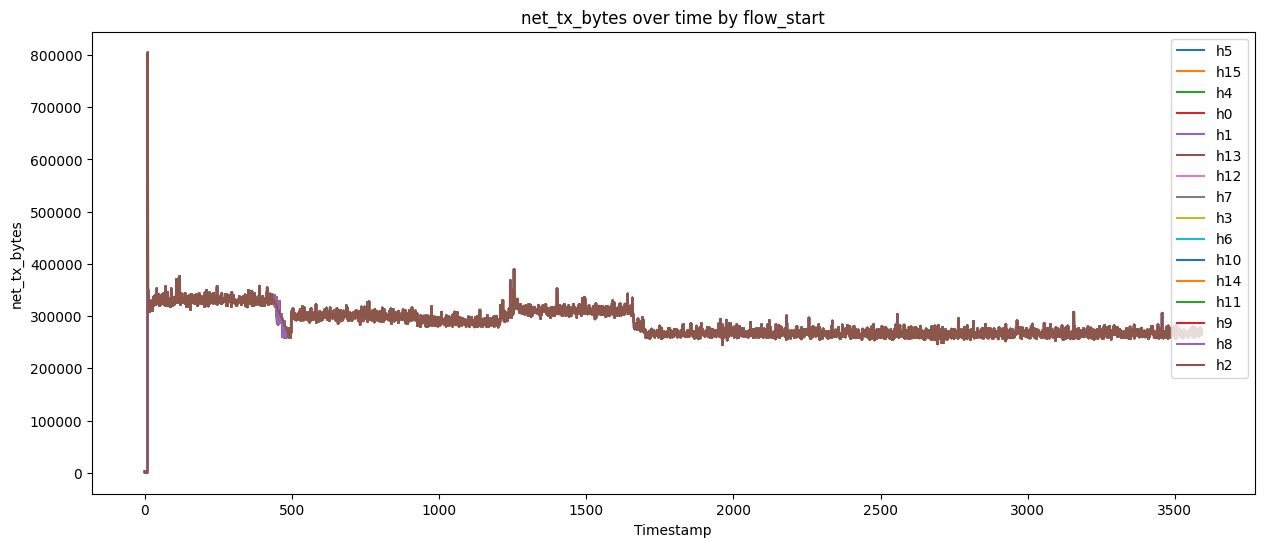

In [26]:
logscale_cols = [
    "jitter_ms",
    # "congestion_score",
    # "net_tx_pkts",
    # "net_tx_bytes",
    # "bandwidth_bps",
    "packets_per_second",
    "link_utilization_percent",
    "one_way_delay_ms",
    "rtt_ms",
]

for col in TARGET_COLUMNS:
    plot_device_stats(col, logscale=col in logscale_cols)

In [33]:
df.group_by("flow_start").all().select(TARGET_COLUMNS)

bandwidth_bps,jitter_ms,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[i64],list[i64]
"[58800.0, 118000.0, … 58800.0]","[5.568, 5.939, … 0.016]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 230.0]","[4.4093, 4.4093, … 4.3496]","[0.588, 1.18, … 0.588]","[5.0, 10.0, … 5.0]","[0.0246, 0.0285, … 0.0024]","[0.0, 0.0, … 115.0]","[1.0, 1.0, … 1.0]","[28, 28, … 630]","[1456, 1456, … 471800]"
"[118000.0, 118000.0, … 118000.0]","[0.011, 0.011, … 0.027]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 184.0]","[4.4093, 4.4093, … 4.3625]","[1.18, 1.18, … 1.18]","[10.0, 10.0, … 10.0]","[0.0048, 0.0048, … 0.0048]","[0.0, 0.0, … 92.0]","[1.0, 1.0, … 1.0]","[0, 28, … 630]","[0, 1456, … 471800]"
"[176000.0, 118000.0, … 100000.0]","[0.011, 0.011, … 0.03]","[96.0, 0.0, … 1.6]","[0.0, 0.0, … 184.0]","[1.0518, 4.4093, … 4.1834]","[1.76, 1.18, … 1.0]","[420.0, 10.0, … 8.64]","[0.4071, 0.0048, … 0.0681]","[0.0, 0.0, … 92.0]","[0.0476, 1.0, … 0.9841]","[0, 0, … 644]","[0, 0, … 475678]"
"[176000.0, 118000.0, … 100000.0]","[0.023, 0.021, … 0.04]","[96.0, 0.0, … 1.6]","[0.0, 0.0, … 350.0]","[1.0518, 4.4093, … 4.1165]","[1.76, 1.18, … 1.0]","[420.0, 10.0, … 8.64]","[0.4071, 0.0048, … 0.0682]","[0.0, 0.0, … 175.0]","[0.0476, 1.0, … 0.9841]","[0, 0, … 644]","[0, 0, … 475678]"
"[176000.0, 118000.0, … 100000.0]","[0.529, 0.423, … 0.032]","[96.0, 0.0, … 1.5]","[0.0, 0.0, … 230.0]","[1.0518, 4.4093, … 4.1773]","[1.76, 1.18, … 1.0]","[410.0, 10.0, … 8.64]","[0.4092, 0.0064, … 0.0641]","[0.0, 0.0, … 115.0]","[0.0488, 1.0, … 0.9851]","[0, 28, … 644]","[0, 1456, … 475678]"
…,…,…,…,…,…,…,…,…,…,…,…
"[706000.0, 118000.0, … 100000.0]","[50.808, 44.656, … 0.243]","[87.0, 0.0, … 1.5]","[0.0, 0.0, … 290.0]","[1.1007, 4.4093, … 4.1536]","[7.06, 1.18, … 1.0]","[455.0, 10.0, … 8.66]","[0.6282, 0.1833, … 0.065]","[0.0, 0.0, … 145.0]","[0.1319, 1.0, … 0.9851]","[0, 0, … 630]","[0, 0, … 471800]"
"[118000.0, 706000.0, … 58800.0]","[44.952, 51.144, … 0.023]","[0.0, 87.0, … 0.0]","[0.0, 0.0, … 337.0]","[4.4093, 1.1007, … 4.3178]","[1.18, 7.06, … 0.588]","[10.0, 455.0, … 5.0]","[0.1845, 0.6282, … 0.0024]","[0.0, 0.0, … 168.5]","[1.0, 0.1319, … 1.0]","[0, 0, … 644]","[0, 0, … 487312]"
"[118000.0, 647000.0, … 100000.0]","[37.585, 42.763, … 0.204]","[0.0, 88.0, … 1.5]","[0.0, 0.0, … 10.6]","[4.4093, 1.0944, … 4.2583]","[1.18, 6.47, … 1.0]","[10.0, 450.0, … 8.65]","[0.1551, 0.5969, … 0.0648]","[0.0, 0.0, … 5.3]","[1.0, 0.1222, … 0.9851]","[0, 0, … 630]","[0, 0, … 471800]"


In [34]:
grouped_df = df.group_by(["flow_start"]).all().sort("flow_start")
grouped_df.head()

flow_start,timestamp,flow_id,interval_start,interval_end,bandwidth_bps,jitter_ms,packet_loss_cnt,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes,flow_end
str,list[i32],list[str],list[i32],list[i32],list[f64],list[f64],list[i64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[i64],list[i64],list[str]
"""h0""","[0, 0, … 590]","[""h0->h8"", ""h0->h8"", … ""h0->h8""]","[0, 0, … 590]","[0, 0, … 590]","[58800.0, 118000.0, … 58800.0]","[5.568, 5.939, … 0.016]","[0, 0, … 0]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 230.0]","[4.4093, 4.4093, … 4.3496]","[0.588, 1.18, … 0.588]","[5.0, 10.0, … 5.0]","[0.0246, 0.0285, … 0.0024]","[0.0, 0.0, … 115.0]","[1.0, 1.0, … 1.0]","[28, 28, … 630]","[1456, 1456, … 471800]","[""h8"", ""h8"", … ""h8""]"
"""h1""","[0, 0, … 589]","[""h1->h15"", ""h1->h15"", … ""h1->h15""]","[0, 0, … 589]","[0, 0, … 589]","[58800.0, 706000.0, … 58800.0]","[35.411, 48.894, … 0.017]","[0, 79, … 0]","[0.0, 87.0, … 0.0]","[0.0, 0.0, … 290.0]","[4.4093, 1.1007, … 4.3321]","[0.588, 7.06, … 0.588]","[5.0, 455.0, … 5.0]","[0.144, 0.6238, … 0.0024]","[0.0, 0.0, … 145.0]","[1.0, 0.1319, … 1.0]","[28, 0, … 644]","[1456, 0, … 487312]","[""h15"", ""h15"", … ""h15""]"
"""h10""","[0, 0, … 589]","[""h10->h13"", ""h10->h13"", … ""h10->h13""]","[0, 0, … 0]","[0, 0, … 589]","[58800.0, 118000.0, … 100000.0]","[40.177, 35.312, … 0.245]","[0, 0, … 79]","[0.0, 0.0, … 1.5]","[0.0, 0.0, … 337.0]","[4.4093, 4.4093, … 4.1345]","[0.588, 1.18, … 1.0]","[5.0, 10.0, … 8.66]","[0.1631, 0.146, … 0.065]","[0.0, 0.0, … 168.5]","[1.0, 1.0, … 0.9851]","[28, 28, … 630]","[1456, 1456, … 471800]","[""h13"", ""h13"", … ""h13""]"
"""h11""","[0, 0, … 589]","[""h11->h5"", ""h11->h5"", … ""h11->h5""]","[0, 0, … 0]","[0, 0, … 589]","[118000.0, 118000.0, … 100000.0]","[36.203, 41.191, … 0.252]","[0, 0, … 79]","[0.0, 0.0, … 1.5]","[0.0, 0.0, … 246.0]","[4.4093, 4.4093, … 4.171]","[1.18, 1.18, … 1.0]","[10.0, 10.0, … 8.66]","[0.1495, 0.1695, … 0.065]","[0.0, 0.0, … 123.0]","[1.0, 1.0, … 0.9851]","[28, 28, … 630]","[1456, 1456, … 471800]","[""h5"", ""h5"", … ""h5""]"
"""h12""","[0, 0, … 589]","[""h12->h3"", ""h12->h3"", … ""h12->h3""]","[0, 0, … 589]","[0, 0, … 589]","[706000.0, 118000.0, … 176000.0]","[52.891, 46.492, … 0.023]","[79, 0, … 0]","[87.0, 0.0, … 0.0]","[0.0, 0.0, … 364.0]","[1.1007, 4.4093, … 4.2956]","[7.06, 1.18, … 1.76]","[455.0, 10.0, … 14.97]","[0.6282, 0.1907, … 0.0071]","[0.0, 0.0, … 182.0]","[0.1319, 1.0, … 1.0]","[0, 0, … 630]","[0, 0, … 471800]","[""h3"", ""h3"", … ""h3""]"


In [35]:
timestamps = grouped_df["timestamp"]
timestamps.describe()

statistic,value
str,f64
"""count""",16.0
"""null_count""",0.0


In [36]:
grouped_df = grouped_df.select(TARGET_COLUMNS)
grouped_df.head()

bandwidth_bps,jitter_ms,packet_loss_percent,rtt_ms,mos,link_utilization_percent,packets_per_second,congestion_score,one_way_delay_ms,throughput_efficiency,net_tx_pkts,net_tx_bytes
list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64],list[i64],list[i64]
"[58800.0, 118000.0, … 58800.0]","[5.568, 5.939, … 0.016]","[0.0, 0.0, … 0.0]","[0.0, 0.0, … 230.0]","[4.4093, 4.4093, … 4.3496]","[0.588, 1.18, … 0.588]","[5.0, 10.0, … 5.0]","[0.0246, 0.0285, … 0.0024]","[0.0, 0.0, … 115.0]","[1.0, 1.0, … 1.0]","[28, 28, … 630]","[1456, 1456, … 471800]"
"[58800.0, 706000.0, … 58800.0]","[35.411, 48.894, … 0.017]","[0.0, 87.0, … 0.0]","[0.0, 0.0, … 290.0]","[4.4093, 1.1007, … 4.3321]","[0.588, 7.06, … 0.588]","[5.0, 455.0, … 5.0]","[0.144, 0.6238, … 0.0024]","[0.0, 0.0, … 145.0]","[1.0, 0.1319, … 1.0]","[28, 0, … 644]","[1456, 0, … 487312]"
"[58800.0, 118000.0, … 100000.0]","[40.177, 35.312, … 0.245]","[0.0, 0.0, … 1.5]","[0.0, 0.0, … 337.0]","[4.4093, 4.4093, … 4.1345]","[0.588, 1.18, … 1.0]","[5.0, 10.0, … 8.66]","[0.1631, 0.146, … 0.065]","[0.0, 0.0, … 168.5]","[1.0, 1.0, … 0.9851]","[28, 28, … 630]","[1456, 1456, … 471800]"
"[118000.0, 118000.0, … 100000.0]","[36.203, 41.191, … 0.252]","[0.0, 0.0, … 1.5]","[0.0, 0.0, … 246.0]","[4.4093, 4.4093, … 4.171]","[1.18, 1.18, … 1.0]","[10.0, 10.0, … 8.66]","[0.1495, 0.1695, … 0.065]","[0.0, 0.0, … 123.0]","[1.0, 1.0, … 0.9851]","[28, 28, … 630]","[1456, 1456, … 471800]"
"[706000.0, 118000.0, … 176000.0]","[52.891, 46.492, … 0.023]","[87.0, 0.0, … 0.0]","[0.0, 0.0, … 364.0]","[1.1007, 4.4093, … 4.2956]","[7.06, 1.18, … 1.76]","[455.0, 10.0, … 14.97]","[0.6282, 0.1907, … 0.0071]","[0.0, 0.0, … 182.0]","[0.1319, 1.0, … 1.0]","[0, 0, … 630]","[0, 0, … 471800]"


In [41]:
num_devices = len(grouped_df)
num_metrics = len(TARGET_COLUMNS)
points_per_variable = min(len(ts) for ts in timestamps)

num_devices, num_metrics, points_per_variable

(16, 12, 2950)

In [42]:
all(len(t) == points_per_variable for t in timestamps)

False

In [43]:
[(i, len(ts)) for i, ts in enumerate(timestamps)]

[(0, 2955),
 (1, 2950),
 (2, 2950),
 (3, 2950),
 (4, 2950),
 (5, 2950),
 (6, 2954),
 (7, 2950),
 (8, 2953),
 (9, 2950),
 (10, 2951),
 (11, 2950),
 (12, 2954),
 (13, 2954),
 (14, 2955),
 (15, 2951)]

In [44]:
final_data = np.zeros(shape=(num_devices, num_metrics, points_per_variable))
final_data.shape

(16, 12, 2950)

In [46]:
for idx in range(num_devices):
    for col_idx, col in enumerate(TARGET_COLUMNS):
        target_array = grouped_df[col][idx].to_numpy()[:points_per_variable]
        final_data[idx, col_idx] = target_array

In [47]:
np.allclose(final_data[0][0], grouped_df["bandwidth_bps"][0][:points_per_variable])

True

In [48]:
import sys

sys.path.append("../")

In [49]:
from src.data.rnn import partition_logs

In [56]:
series, targets = partition_logs(
    final_data,
    lookback=64,
    horizon=16,
)

In [57]:
series.shape, targets.shape

((2871, 64, 16, 12), (2871, 16, 16, 12))

In [52]:
series[0, :, 0, 1], targets[0, :, 0, 0]

(array([5.568, 5.939, 6.756, 7.669, 3.462, 3.939, 4.2  , 4.778, 5.157,
        2.853, 2.519, 2.223, 2.085, 3.043, 1.842, 1.63 , 1.447, 1.358,
        1.201, 1.068, 1.016, 0.895, 0.8  , 0.753, 0.668, 0.593, 0.533,
        0.503, 0.448, 0.406, 0.385, 0.361, 0.331, 0.313, 0.292, 0.267,
        0.28 , 0.284, 0.263, 0.264, 0.252, 0.233, 0.219, 0.206, 0.184,
        0.166, 0.161, 0.153, 0.158, 0.15 , 0.147, 0.137, 0.131, 0.129,
        0.135, 0.126, 0.125, 0.124, 0.115, 0.108, 0.11 , 0.102, 0.096,
        0.094]),
 array([118000.]))

In [53]:
series[1, :, 0, 1]

array([5.939, 6.756, 7.669, 3.462, 3.939, 4.2  , 4.778, 5.157, 2.853,
       2.519, 2.223, 2.085, 3.043, 1.842, 1.63 , 1.447, 1.358, 1.201,
       1.068, 1.016, 0.895, 0.8  , 0.753, 0.668, 0.593, 0.533, 0.503,
       0.448, 0.406, 0.385, 0.361, 0.331, 0.313, 0.292, 0.267, 0.28 ,
       0.284, 0.263, 0.264, 0.252, 0.233, 0.219, 0.206, 0.184, 0.166,
       0.161, 0.153, 0.158, 0.15 , 0.147, 0.137, 0.131, 0.129, 0.135,
       0.126, 0.125, 0.124, 0.115, 0.108, 0.11 , 0.102, 0.096, 0.094,
       0.085])